In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
from sklearn import tree

# Load the dataset
df = pd.read_csv('./data/supermarket_sales.csv')

# Display first few rows of the data
print(df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [2]:
df.shape

(1000, 17)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [5]:
# --- Data Preprocessing ---
# Convert 'Date' to datetime and extract day, month, and year
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], drop_first=True)

# Define target variable ('High Spending' if total is above average)
df_encoded['High_Spending'] = np.where(df_encoded['Total'] > df_encoded['Total'].mean(), 1, 0)

# Drop unnecessary columns
df_encoded.drop(['Invoice ID', 'Date', 'Time', 'Total', 'gross income'], axis=1, inplace=True)

# Split the data into training and testing sets
X = df_encoded.drop('High_Spending', axis=1)
y = df_encoded['High_Spending']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# --- Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

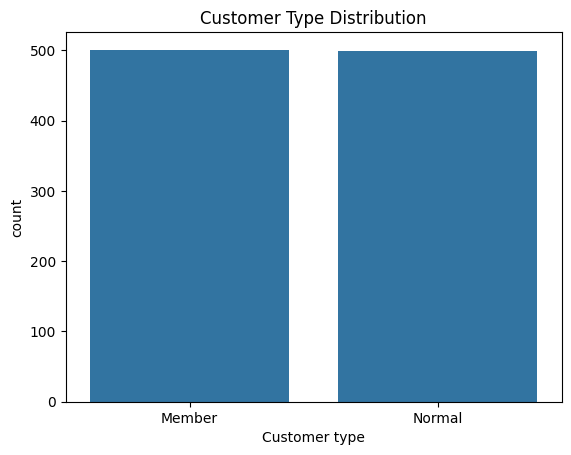

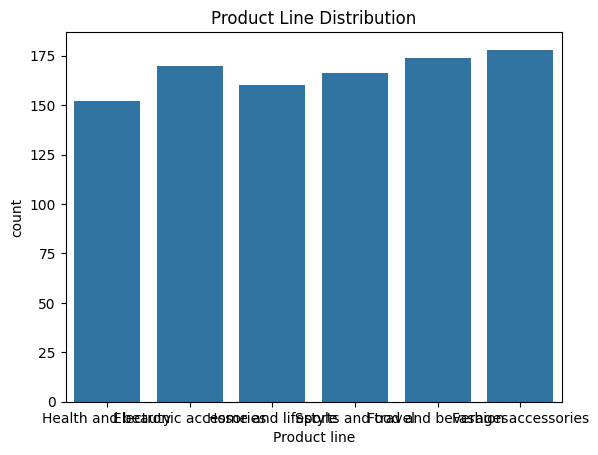

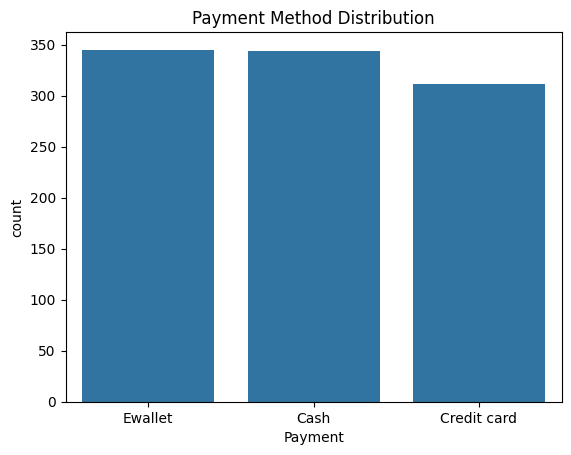

In [7]:
# --- EDA: Visualizing Key Features ---
# Plot the distribution of customer type, product line, and payment methods
sns.countplot(x='Customer type', data=df)
plt.title('Customer Type Distribution')
plt.savefig('images/customer_type_distribution.png')
plt.show()

sns.countplot(x='Product line', data=df)
plt.title('Product Line Distribution')
plt.savefig('images/product_line_distribution.png')
plt.show()

sns.countplot(x='Payment', data=df)
plt.title('Payment Method Distribution')
plt.savefig('images/payment_method_distribution.png')
plt.show()

In [8]:
# --- Modeling ---

# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       175
           1       0.99      0.94      0.97       125

    accuracy                           0.97       300
   macro avg       0.98      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

Accuracy: 0.9733333333333334
ROC AUC: 0.9691428571428572


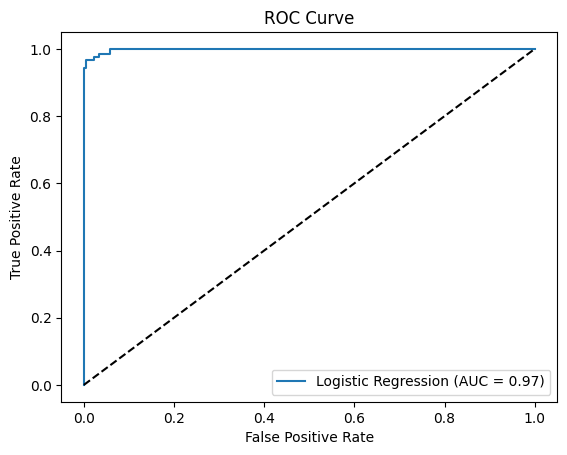

In [11]:
# --- Evaluation ---

# Logistic Regression Evaluation
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("ROC AUC:", roc_auc_score(y_test, y_pred_logreg))

# Plot ROC Curve for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (AUC = %0.2f)" % roc_auc_score(y_test, y_pred_logreg))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('images/roc_curve_logreg.png')
plt.show()

In [12]:
# --- Feature Importance ---
feature_importance = logreg.coef_[0]
features = X.columns

# Print feature importance
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance:.2f}")

Unit price: 1.26
Quantity: 1.49
Tax 5%: 3.97
cogs: 3.97
gross margin percentage: -0.00
Rating: 0.04
Day: 0.05
Month: -0.08
Year: 0.00
Branch_B: -0.00
Branch_C: -0.06
City_Naypyitaw: -0.06
City_Yangon: 0.06
Customer type_Normal: 0.17
Gender_Male: -0.11
Product line_Fashion accessories: -0.49
Product line_Food and beverages: -0.10
Product line_Health and beauty: -0.15
Product line_Home and lifestyle: -0.11
Product line_Sports and travel: 0.15
Payment_Credit card: 0.16
Payment_Ewallet: -0.18
